In [7]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafilename = "data_processed-without-outliers.csv"
d = pd.read_csv(datafilename)
print("Loading", len(d), "lines.")

resultsfilename = "data_stats-without-outliers.csv"
stats = pd.read_csv(resultsfilename)
print("Loading", len(stats), "lines.")

# functions to calculate AUC and plot ROC

def cummulative(x):
    return [sum(x[0:i+1]) for i in range(len(x))]

def get_auc(x, y):
    # make cummulative
    x, y = cummulative(x), cummulative(y)
    # normalize
    x = [xi/max(x) for xi in x]
    y = [yi/max(y) for yi in y]
    auc = 0
    x1, y1 = 0, 0
    for x2, y2 in zip(x, y):
        auc += (x2 - x1) * (y1 + y2) / 2
        x1, y1 = x2, y2
    return auc

def plot_roc(x, y):
    x, y = cummulative(x), cummulative(y)
    plt.plot((min(x), max(x)), (min(y), max(y)), color='red', linewidth=1, linestyle='--')
    for i in range(len(x)-1):
        plt.plot((x[i], x[i+1]), (y[i], y[i+1]
                                 ), color='black', linewidth=1)
    for i in range(len(x)):
        plt.scatter(x[i], y[i], marker='o', s=30, color='black')
    #plt.xlim(0.0, 1.0)
    #plt.ylim(0.0, 1.0)
    plt.show()

Loading 12585 lines.
Loading 700 lines.


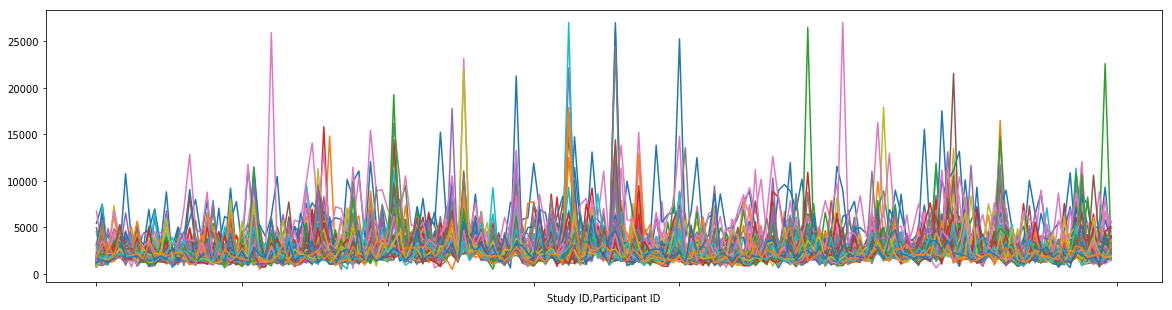

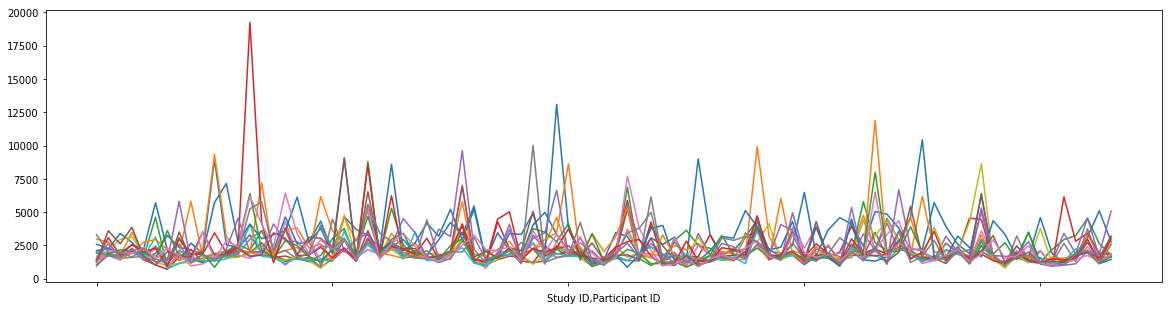

In [8]:
def plot_times(d):
    times = pd.DataFrame(d, columns=["ix", "Study ID", "Participant ID", "Test ID", "Test type", "Response time"])
    times["ix"] = times.groupby(["Study ID", "Participant ID"]).cumcount()
    del times["Test ID"]
    del times["Test type"]
    times.set_index(["Study ID", "Participant ID", "ix"], inplace=True)
    times = times.unstack("ix")
    times.plot(figsize=(20, 5), legend=False)

# plot times for all responses without outliers

plot_times(d)

plot_times(d[(d["Designer"] == "Non-designer") & (d["Category"] == "word") & (d["Font"] == "arial")])






Charts for study #1


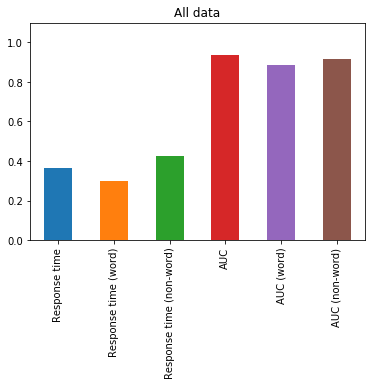

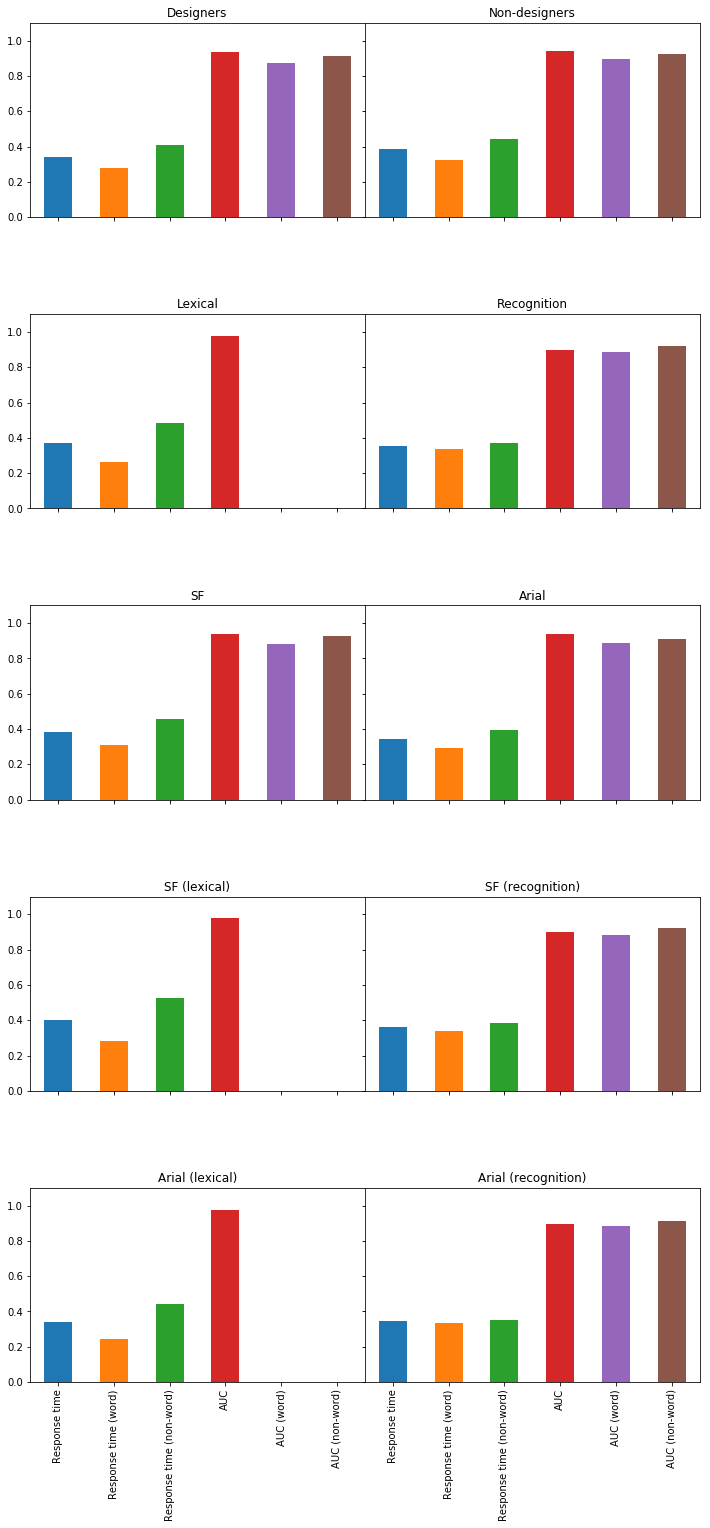

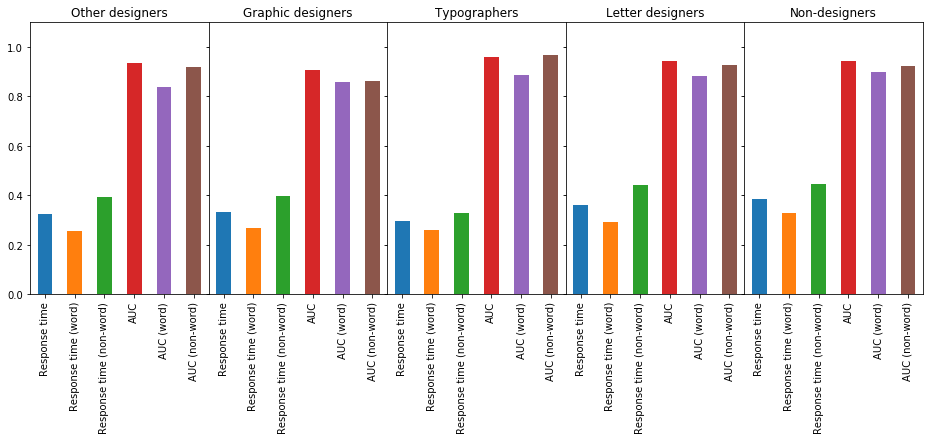

In [16]:

def plot_comparisons(sid):
    
    cols = ["Response time", "Response time (word)", "Response time (non-word)", "AUC", "AUC (word)", "AUC (non-word)"]
    
    # narrow down and copy stats
    st = stats[stats["Study ID"] == sid].copy()

    # normalize times
    max_time = st["Response time"].max()
    for c in st.columns:
        if "time" in str(c):
            st[c] /= max_time

    print("Charts for study #%d" % sid)

    
    # metrics for all data
    
    st[cols].mean().plot.bar(ylim=(0, 1.1), title="All data", sharex=True, sharey=True)

    fig, axes = plt.subplots(5, 2, figsize=(12, 25))
    plt.subplots_adjust(wspace=0, hspace=0.5)

    
    # comparison between different groups, typefaces, and tests
    
    stt = st[st["isDesigner"]]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Designers", sharex=True, sharey=True, ax=axes[0][0])

    stt = st[st["isDesigner"] == False]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Non-designers", sharex=True, sharey=True, ax=axes[0][1])

    stt = st[st["Test type"] == "lexical"]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Lexical", sharex=True, sharey=True, ax=axes[1][0])

    stt = st[st["Test type"] == "recognition"]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Recognition", sharex=True, sharey=True, ax=axes[1][1])

    stt = st[st["Font"] == "sansforgetica"]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="SF", sharex=True, sharey=True, ax=axes[2][0])

    stt = st[st["Font"] == "arial"]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Arial", sharex=True, sharey=True, ax=axes[2][1])

    stt = st[(st["Font"] == "sansforgetica") & (st["Test type"] == "lexical")]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="SF (lexical)", sharex=True, sharey=True, ax=axes[3][0])

    stt = st[(st["Font"] == "sansforgetica") & (st["Test type"] == "recognition")]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="SF (recognition)", sharex=True, sharey=True, ax=axes[3][1])

    stt = st[(st["Font"] == "arial") & (st["Test type"] == "lexical")]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Arial (lexical)", sharex=True, sharey=True, ax=axes[4][0])

    stt = st[(st["Font"] == "arial") & (st["Test type"] == "recognition")]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Arial (recognition)", sharex=True, sharey=True, ax=axes[4][1])
    
    fig.savefig("images/study_%d_comparisons.pdf" % sid)
    
    
    # comparison across different design skills
    
    fig, axes = plt.subplots(1, 5, figsize=(16, 5))
    plt.subplots_adjust(wspace=0, hspace=0.5)
    
    stt = st[st["Designer"] == "Other designer"]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Other designers", sharex=True, sharey=True, ax=axes[0])
    
    stt = st[st["Designer"] == "Graphic designer"]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Graphic designers", sharex=True, sharey=True, ax=axes[1])
    
    stt = st[st["Designer"] == "Typographer"]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Typographers", sharex=True, sharey=True, ax=axes[2])
    
    stt = st[st["Designer"] == "Letter designer"]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Letter designers", sharex=True, sharey=True, ax=axes[3])
    
    stt = st[st["Designer"] == "Non-designer"]
    stt[cols].mean().plot.bar(ylim=(0, 1.1), title="Non-designers", sharex=True, sharey=True, ax=axes[4])
    
    fig.savefig("images/study_%d_comparisons-design-skills.pdf" % sid, bbox_inches="tight", pad_inches=0.3)

plot_comparisons(1)

Charts for study #2


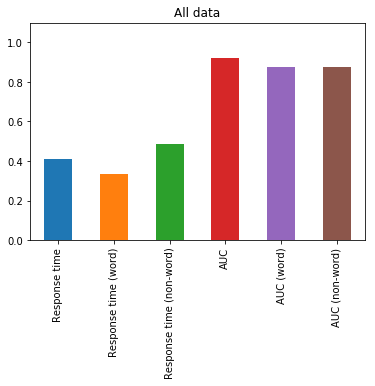

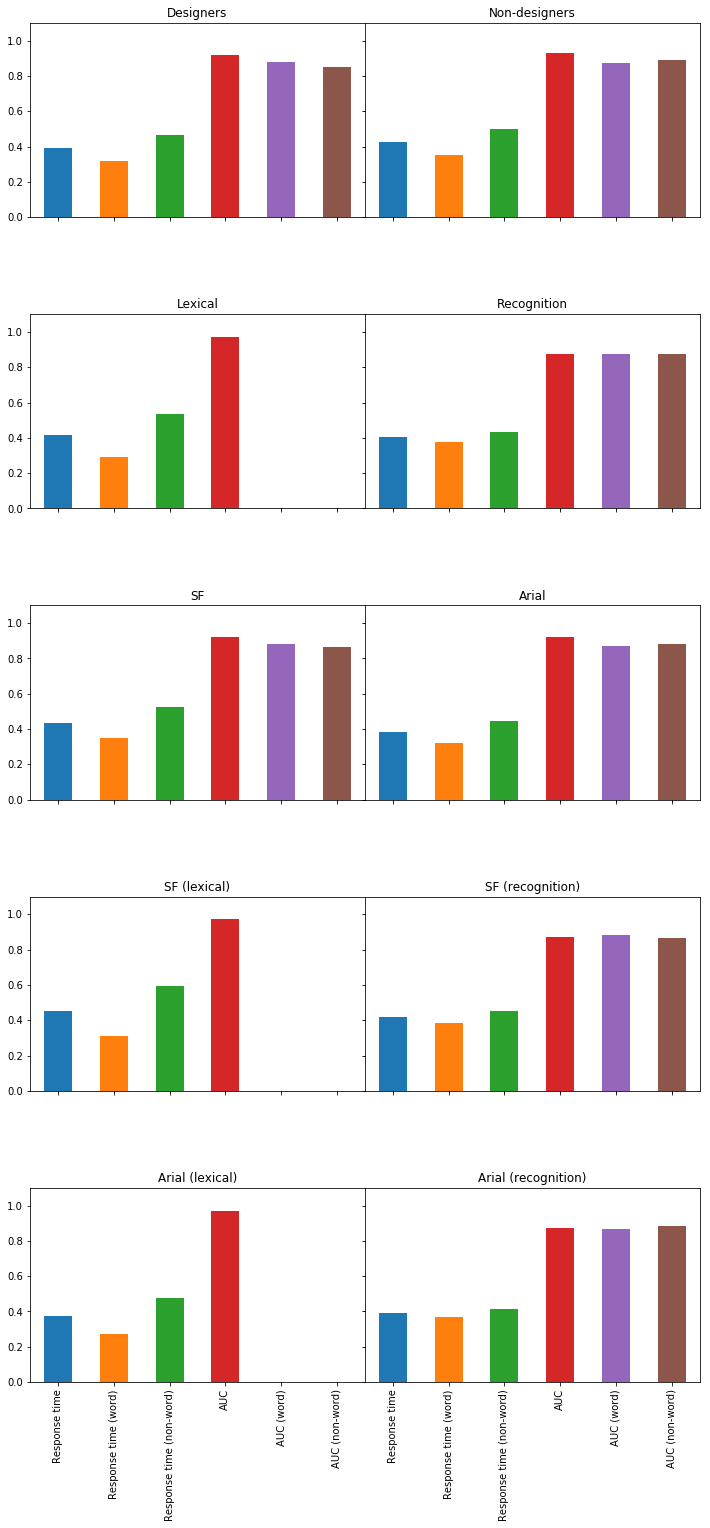

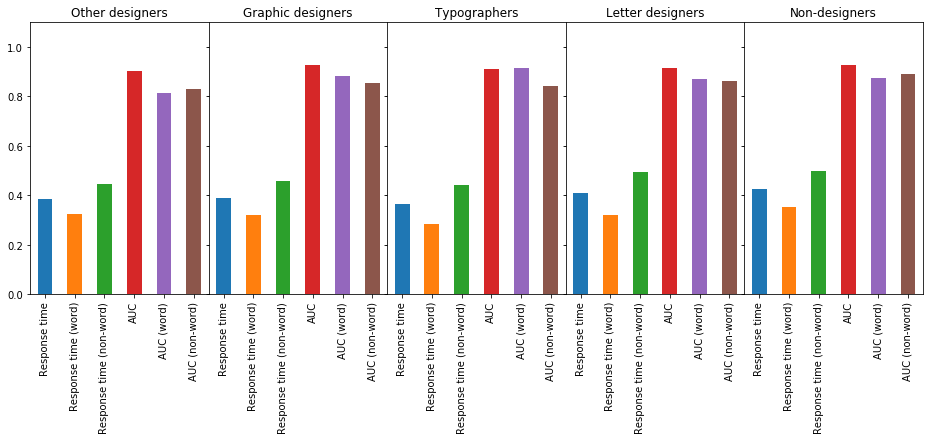

In [17]:
plot_comparisons(2)